# Datafiles in the NWB format

We use the NWB data standard to store and share our multimodal neurophysiological recordings:

From the NWB  webiste https://www.nwb.org/:

> Neurodata Without Borders: Neurophysiology (NWB:N) is a data standard for neurophysiology, providing neuroscientists with a common standard to share, archive, use, and build analysis tools for neurophysiology data. NWB:N is designed to store a variety of neurophysiology data, including data from intracellular and extracellular electrophysiology experiments, data from optical physiology experiments, and tracking and stimulus data.

We rely on the python API to create such files, see:

https://pynwb.readthedocs.io/en/stable/

The script to build such data files is [build_NWB.py](./build_NWB.py) and we update those files (e.g. to add processed data) the script [update_NWB.py](./update_NWB.py)



In [1]:
# loading the python NWB API
import pynwb
import os
import numpy as np # numpy for numerical analysis
import matplotlib.pylab as plt # + matplotlib for vizualization

In [2]:
# loading an example file
filename = 'DATA/2021_04_26-16-49-48.nwb'
io = pynwb.NWBHDF5IO(os.path.join(os.path.expanduser('~'), filename), 'r')
nwbfile = io.read() # don't forget to close afterwards !! (io.close() )

In [4]:
# let's have a look at what is inside
print(nwbfile)

root pynwb.file.NWBFile at 0x140479286481248
Fields:
  acquisition: {
    CaImaging-TimeSeries <class 'pynwb.ophys.TwoPhotonSeries'>,
    FaceCamera <class 'pynwb.image.ImageSeries'>,
    Photodiode-Signal <class 'pynwb.base.TimeSeries'>,
    Pupil <class 'pynwb.image.ImageSeries'>,
    Running-Speed <class 'pynwb.base.TimeSeries'>
  }
  devices: {
    Imaging device with settings: 
 {'activeMode': 'ResonantGalvo', 'bitDepth': '13', 'currentScanAmplitude': {'XAxis': '-2.9', 'YAxis': '-7.6'}, 'currentScanCenter': {'XAxis': '-0.25', 'YAxis': '0'}, 'dwellTime': '1.2', 'framePeriod': '0.033325246', 'interlacedScanTrackCount': '0', 'laserPower': {'Imaging': '204', '405': '0', '488': '0', '561': '0'}, 'laserWavelength': {'Excitation 1': '950'}, 'linesPerFrame': '512', 'maxVoltage': {'XAxis': '7.35', 'YAxis': '-7.6'}, 'micronsPerPixel': {'XAxis': '1.1484375', 'YAxis': '1.1484375', 'ZAxis': '1'}, 'minVoltage': {'XAxis': '-7.85', 'YAxis': '7.6'}, 'objectiveLens': 'Olympus 20x', 'objectiveLensMa

## Acquisition fields

In [8]:
nwbfile.acquisition

{'CaImaging-TimeSeries': CaImaging-TimeSeries pynwb.ophys.TwoPhotonSeries at 0x2149559632608
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (357, 512, 512), type "|u1">
   description: no description
   dimension: <HDF5 dataset "dimension": shape (1,), type "<i8">
   imaging_plane: my_imgpln pynwb.ophys.ImagingPlane at 0x2149559720784
 Fields:
   conversion: 1.0
   description: Depth=0.0[um]
   device: Imaging device with settings: 
  {'activeMode': 'ResonantGalvo', 'bitDepth': '13', 'currentScanAmplitude': {'XAxis': '-2.9', 'YAxis': '-7.6'}, 'currentScanCenter': {'XAxis': '-0.25', 'YAxis': '0'}, 'dwellTime': '1.2', 'framePeriod': '0.033324111', 'interlacedScanTrackCount': '0', 'laserPower': {'Imaging': '150', '405': '0', '488': '0', '561': '0'}, 'laserWavelength': {'Excitation 1': '950'}, 'linesPerFrame': '512', 'maxVoltage': {'XAxis': '7.35', 'YAxis': '-7.6'}, 'micronsPerPixel': {'XAxis': '1.1484375', 'YAxis': '1.1484375', 'ZAxis': '1'}, 'mi

### FaceCamera

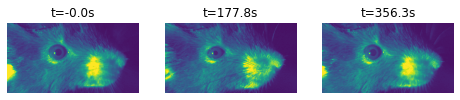

In [18]:
fig, AX = plt.subplots(1,3, figsize=(8,3))
for i, ax in zip(np.linspace(0, nwbfile.acquisition['FaceCamera'].data.shape[0]-1, 3, dtype=int), AX):
    ax.imshow(nwbfile.acquisition['FaceCamera'].data[i, :, :])
    ax.axis('off')
    ax.set_title("t=%.1fs" % nwbfile.acquisition['FaceCamera'].timestamps[i])

### Pupil

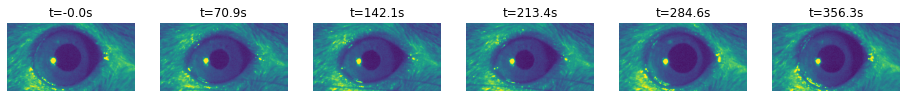

In [15]:
fig, AX = plt.subplots(1,6, figsize=(16,3))
for i, ax in zip(np.linspace(0, nwbfile.acquisition['Pupil'].data.shape[0]-1, 6, dtype=int), AX):
    ax.imshow(nwbfile.acquisition['Pupil'].data[i, :, :])
    ax.axis('off')
    ax.set_title("t=%.1fs" % nwbfile.acquisition['Pupil'].timestamps[i])

### Calcium-Imaging time series

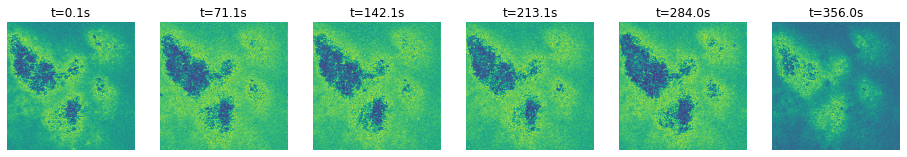

In [16]:
fig, AX = plt.subplots(1,6, figsize=(16,3))
for i, ax in zip(np.linspace(0, nwbfile.acquisition['CaImaging-TimeSeries'].data.shape[0]-1, 6, dtype=int), AX):
    ax.imshow(nwbfile.acquisition['CaImaging-TimeSeries'].data[i, :, :])
    ax.axis('off')
    ax.set_title("t=%.1fs" % nwbfile.acquisition['CaImaging-TimeSeries'].timestamps[i])

### Locomotion

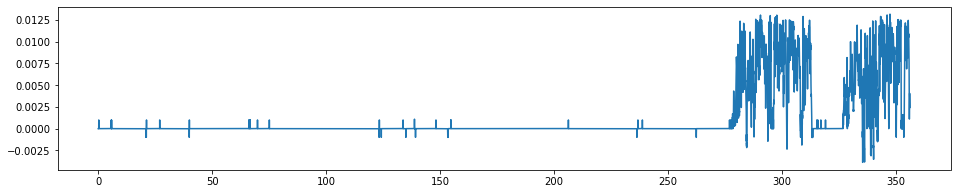

In [52]:
locomotion = nwbfile.acquisition['Running-Speed']
t = np.arange(locomotion.data.shape[0])/locomotion.rate
fig, ax = plt.subplots(1, figsize=(16,3))
ax.plot(t, locomotion.data[:])

## Processing fields

In [33]:
print(nwbfile.processing)

{'Pupil': Pupil pynwb.base.ProcessingModule at 0x2149559794560
Fields:
  data_interfaces: {
    cx <class 'pynwb.base.TimeSeries'>,
    cy <class 'pynwb.base.TimeSeries'>,
    sx <class 'pynwb.base.TimeSeries'>,
    sy <class 'pynwb.base.TimeSeries'>
  }
  description: processed quantities of Pupil dynamics
, 'ophys': ophys pynwb.base.ProcessingModule at 0x2149559795664
Fields:
  data_interfaces: {
    Backgrounds_0 <class 'pynwb.base.Images'>,
    Deconvolved <class 'pynwb.ophys.Fluorescence'>,
    Fluorescence <class 'pynwb.ophys.Fluorescence'>,
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>,
    Neuropil <class 'pynwb.ophys.Fluorescence'>
  }
  description: optical physiology processed data
}


### Pupil size and position

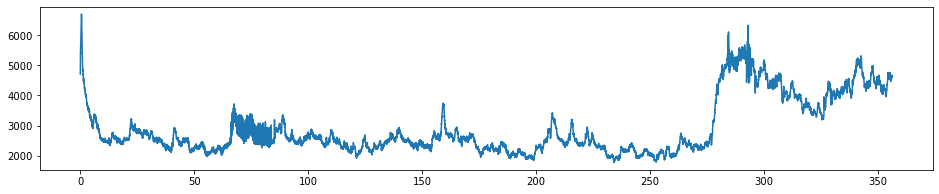

In [46]:
tdata

### optical physiology output

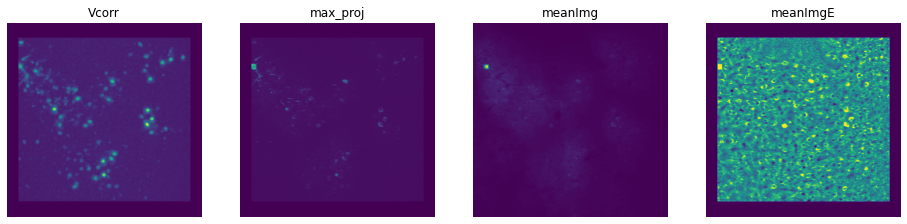

In [23]:
# "backgrounds_0" key
fig, AX = plt.subplots(1,4, figsize=(16,4))
for key, ax in zip(nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'].images, AX):
    ax.imshow(nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'].images[key][:])
    ax.axis('off')
    ax.set_title(key)
meanImg = nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'].images['meanImg'][:] # we store this

In [24]:
# Image Segmentation output
print(nwbfile.processing['ophys'].data_interfaces['ImageSegmentation'].plane_segmentations)

{'PlaneSegmentation': PlaneSegmentation pynwb.ophys.PlaneSegmentation at 0x2149559994064
Fields:
  colnames: ['pixel_mask' 'iscell']
  columns: (
    pixel_mask_index <class 'hdmf.common.table.VectorIndex'>,
    pixel_mask <class 'hdmf.common.table.VectorData'>,
    iscell <class 'hdmf.common.table.VectorData'>
  )
  description: suite2p output
  id: id <class 'hdmf.common.table.ElementIdentifiers'>
  imaging_plane: my_imgpln pynwb.ophys.ImagingPlane at 0x2149559720784
Fields:
  conversion: 1.0
  description: Depth=0.0[um]
  device: Imaging device with settings: 
 {'activeMode': 'ResonantGalvo', 'bitDepth': '13', 'currentScanAmplitude': {'XAxis': '-2.9', 'YAxis': '-7.6'}, 'currentScanCenter': {'XAxis': '-0.25', 'YAxis': '0'}, 'dwellTime': '1.2', 'framePeriod': '0.033324111', 'interlacedScanTrackCount': '0', 'laserPower': {'Imaging': '150', '405': '0', '488': '0', '561': '0'}, 'laserWavelength': {'Excitation 1': '950'}, 'linesPerFrame': '512', 'maxVoltage': {'XAxis': '7.35', 'YAxis': '-

In [25]:
# fetch quantities
Segmentation = nwbfile.processing['ophys'].data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
pixel_masks_index = Segmentation.columns[0].data[:]
pixel_masks = Segmentation.columns[1].data[:]
iscell = Segmentation.columns[2].data[:,0].astype(bool)

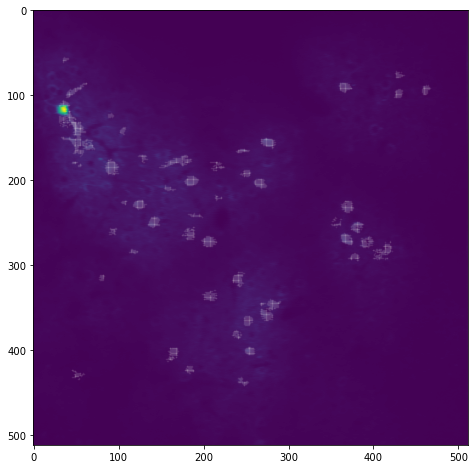

In [26]:
plt.figure(figsize=(10,8))
for i in np.arange(len(iscell))[iscell]:
    indices = np.arange(pixel_masks_index[i], pixel_masks_index[i+1])
    x, y = [pixel_masks[ii][1] for ii in indices], [pixel_masks[ii][0] for ii in indices]
    plt.scatter(x, y, color='w', alpha=0.05, s=1)
plt.imshow(meanImg)

(-8.32936154445, 174.91659243344998, -3.173349867016077, 65.10349285081028)

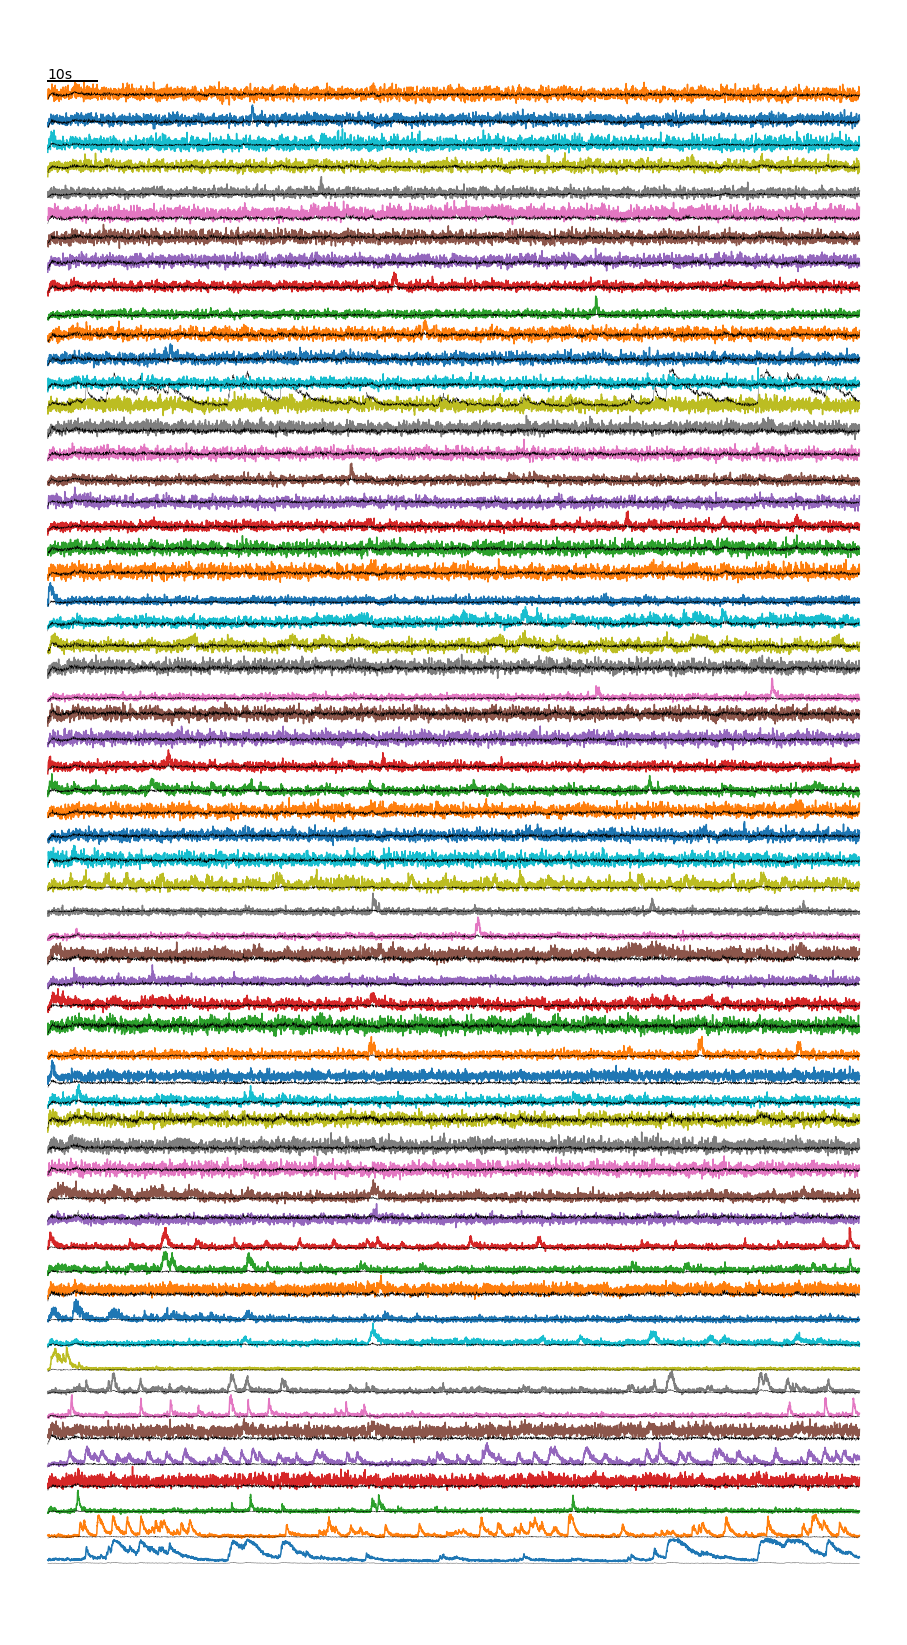

In [31]:
# Fluorescence and Neuropil
dt = 1./nwbfile.processing['ophys'].data_interfaces['Neuropil'].roi_response_series['Neuropil'].rate # in s
t = dt*np.arange(nwbfile.processing['ophys'].data_interfaces['Neuropil'].roi_response_series['Neuropil'].data.shape[1])
Fluorescence = nwbfile.processing['ophys'].data_interfaces['Fluorescence'].roi_response_series['Fluorescence']
Neuropil = nwbfile.processing['ophys'].data_interfaces['Neuropil'].roi_response_series['Neuropil']
Deconvolved = nwbfile.processing['ophys'].data_interfaces['Deconvolved'].roi_response_series['Deconvolved']
# we plot just the first 5000 time samples

plt.figure(figsize=(16,30))
for k, i in enumerate(np.arange(len(iscell))[iscell]):
    #fluo_resp = Deconvolved.data[i,:5000] 
    fluo_resp = Fluorescence.data[i,:5000]
    nrp_resp = Neuropil.data[i,:5000]
    plt.plot(t[:5000],k+(fluo_resp-fluo_resp.min())/(fluo_resp.max()-fluo_resp.min()))
    plt.plot(t[:5000],k+(nrp_resp-fluo_resp.min())/(fluo_resp.max()-fluo_resp.min()), 'k', lw=0.3)
plt.plot([0,10], [k+1,k+1], 'k-', lw=2)
plt.annotate('10s', (0,k+1.1), size=14)
plt.axis('off')

In [14]:
io.close()

### Red channel in Ophys

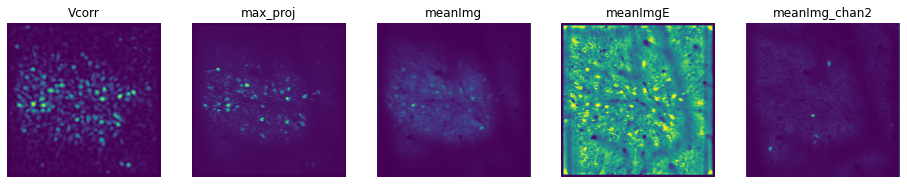

In [13]:
filename = '/home/yann/UNPROCESSED/2021_06_17/2021_06_17-12-05-31.nwb'
import pynwb
import matplotlib.pylab as plt
import numpy as np
io = pynwb.NWBHDF5IO(filename, 'r')
nwbfile = io.read() # don't forget to close afterwards !! (io.close() )

# "backgrounds_0" key
fig, AX = plt.subplots(1,5, figsize=(16,4))
for key, ax in zip(nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'].images, AX):
    ax.imshow(nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'].images[key][:])
    ax.axis('off')
    ax.set_title(key)
meanImg = nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'].images['meanImg'][:] # we store this
meanImg2 = nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'].images['meanImg_chan2'][:] # we store this

In [14]:
Segmentation = nwbfile.processing['ophys'].data_interfaces['ImageSegmentation'].plane_segmentations['PlaneSegmentation']
pixel_masks_index = Segmentation.columns[0].data[:]
pixel_masks = Segmentation.columns[1].data[:]
iscell = Segmentation.columns[2].data[:,0].astype(bool)
redcell = Segmentation.columns[3].data[:,0].astype(bool)

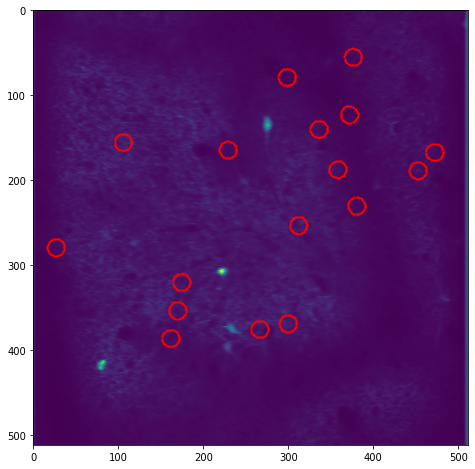

In [21]:
plt.figure(figsize=(10,8))
t = np.linspace(0, 2*np.pi, 50)
for i in np.arange(len(iscell))[redcell]:
    indices = np.arange(pixel_masks_index[i], pixel_masks_index[i+1])
    x, y = [pixel_masks[ii][1] for ii in indices], [pixel_masks[ii][0] for ii in indices]
    plt.scatter(np.mean(x)+np.cos(t)*10,np.mean(y)+np.sin(t)*10, color='r', s=1)
plt.imshow(meanImg2)

In [ ]:
io.close()